In [1]:
# Importing the Keras libraries and packages
import tensorflow as tf

In [2]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, padding="same", input_shape=(64, 64, 3),
                                             activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()


C:\Users\VICTUS\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,801 (8.07 MB)

 Trainable params: 2,116,801 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(r'C:\Users\VICTUS\OneDrive\Pictures\Covid-19-chest-x-ray-detection-main\Data\train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\VICTUS\OneDrive\Pictures\Covid-19-chest-x-ray-detection-main\Data\test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 189 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [4]:
#training 
history = classifier.fit(training_set,
                         steps_per_epoch=4,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=4)

C:\Users\VICTUS\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 816ms/step - accuracy: 0.1840 - loss: 0.0735 - val_accuracy: 0.3030 - val_loss: -0.8032
Epoch 2/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0312 - loss: -1.3554

C:\Users\VICTUS\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.0938 - loss: -1.3167 - val_accuracy: 0.3182 - val_loss: -2.2144
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 559ms/step - accuracy: 0.2400 - loss: -4.7184 - val_accuracy: 0.3182 - val_loss: -6.9992
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.2031 - loss: -15.4988 - val_accuracy: 0.3182 - val_loss: -11.4385
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 535ms/step - accuracy: 0.2160 - loss: -18.9525 - val_accuracy: 0.3636 - val_loss: -26.6018
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.3281 - loss: -32.0762 - val_accuracy: 0.4242 - val_loss: -38.3737
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 584ms/step - accuracy: 0.3760 - loss: -54.8302 - val_accuracy: 0.3182 - val_loss: -73.9957
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.3438 - loss: -84.7933 - val_accuracy: 0.3182 - val_loss: -100.5517
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 554ms/step - accuracy: 0.3120 - loss: -148.8340 - val_accuracy: 0

In [6]:
classifier.save(r'C:\Users\VICTUS\OneDrive\Music\my_model_vgg16.h5')

In [7]:
# evaluation on test set
loaded_model = tf.keras.models.load_model(r'C:\Users\VICTUS\OneDrive\Music\my_model_vgg16.h5')
loaded_model.evaluate(test_set)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.3182 - loss: -224.4582


[-224.45822143554688, 0.3181818127632141]

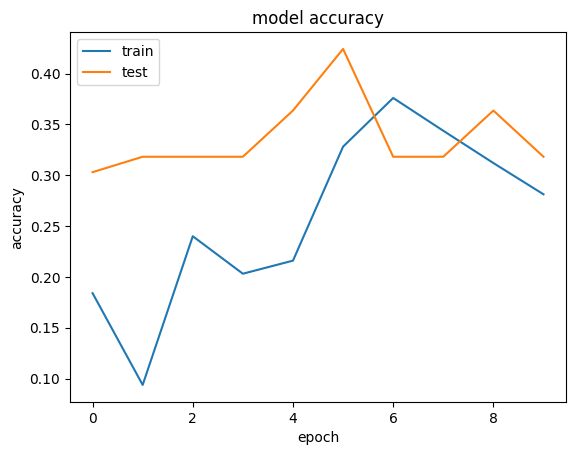

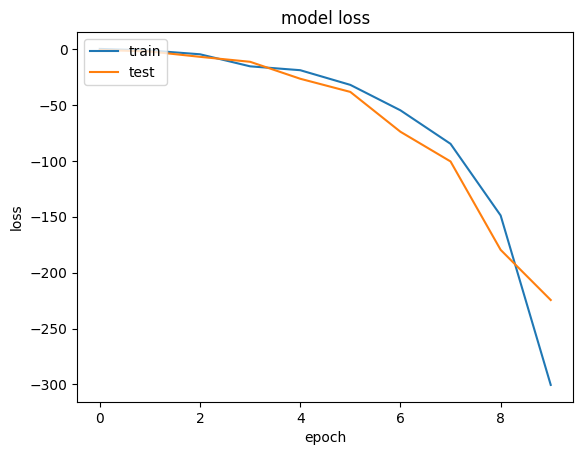

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [9]:
# for only one prediction
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img(r'C:\Users\VICTUS\OneDrive\Pictures\Covid-19-chest-x-ray-detection-main\Data\actual test set\16672_1_1.jpg',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\VICTUS\\OneDrive\\Pictures\\Covid-19-chest-x-ray-detection-main\\Data\\actual test set\\16672_1_1.jpg'

In [10]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Initialize lists
y_pred = []
y_test = []

# Define base paths - using raw strings and os.path.join
base_path = r"C:\Users\VICTUS\OneDrive\Pictures\Covid-19-chest-x-ray-detection-main\Data\test"
normal_path = os.path.join(base_path, "Normal")
covid_path = os.path.join(base_path, "Covid")

# Verify paths exist
if not os.path.exists(normal_path):
    raise FileNotFoundError(f"Directory not found: {normal_path}")
if not os.path.exists(covid_path):
    raise FileNotFoundError(f"Directory not found: {covid_path}")

# Process Normal images
for img_name in os.listdir(normal_path):
    try:
        img_path = os.path.join(normal_path, img_name)
        img = image.load_img(img_path, target_size=(64, 64))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        # Note: predict_classes is deprecated in newer versions
        p = classifier.predict(img)
        y_test.append(p[0, 0])
        y_pred.append(1)  # Assuming 1 represents Normal
    except Exception as e:
        print(f"Error processing {img_name}: {str(e)}")

# Process Covid images
for img_name in os.listdir(covid_path):
    try:
        img_path = os.path.join(covid_path, img_name)
        img = image.load_img(img_path, target_size=(64, 64))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        p = classifier.predict(img)
        y_test.append(p[0, 0])
        y_pred.append(0)  # Assuming 0 represents Covid
    except Exception as e:
        print(f"Error processing {img_name}: {str(e)}")

# Convert to numpy arrays
y_pred = np.array(y_pred)
y_test = np.array(y_test)

print(f"Processed {len(y_pred)} images total")
print(f"Normal samples: {sum(y_pred)}")
print(f"Covid samples: {len(y_pred) - sum(y_pred)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

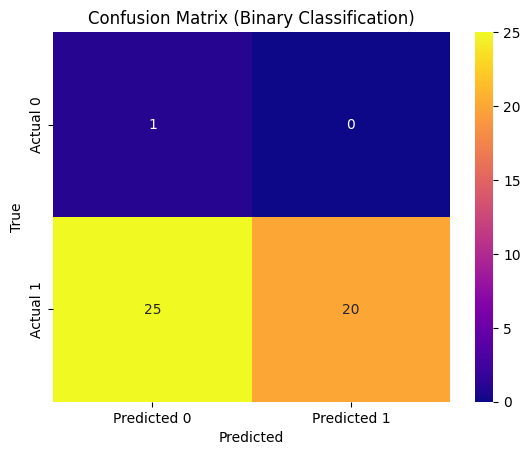

              precision    recall  f1-score   support

           0       0.04      1.00      0.07         1
           1       1.00      0.44      0.62        45

    accuracy                           0.46        46
   macro avg       0.52      0.72      0.34        46
weighted avg       0.98      0.46      0.60        46

Optimal threshold: 0

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        45

    accuracy                           0.98        46
   macro avg       0.49      0.50      0.49        46
weighted avg       0.96      0.98      0.97        46



c:\Users\VICTUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\VICTUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\VICTUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Round y_test to binary (0 or 1)
y_test_binary = np.round(y_test).astype(int)

# Option 1: Use fixed threshold (0.5)
y_pred_class = (y_pred >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Binary Classification)")
plt.show()

# Classification Report
print(classification_report(y_test_binary, y_pred_class))

# Option 2: Find optimal threshold (if needed)
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred)
best_threshold = thresholds[np.argmax(precision + recall)]
print(f"Optimal threshold: {best_threshold}")

# Predict with optimal threshold
y_pred_optimal = (y_pred >= best_threshold).astype(int)
print("\nClassification Report (Optimal Threshold):")
print(classification_report(y_test_binary, y_pred_optimal))

In [12]:
print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)

y_pred shape: (46,)
y_test shape: (46,)


In [13]:
print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)
print("Unique values in y_test:", np.unique(y_test))

y_pred shape: (46,)
y_test shape: (46,)
Unique values in y_test: [0. 1.]
